In [227]:
import pandas as pd
from src.transform import Normalizer, LengthScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

import numpy as np

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


pd.set_option("display.max_colwidth", 10000)

from sklearn.linear_model import LogisticRegression
from src.utils import is_german, save_model
from sklearnex import patch_sklearn
import matplotlib.pyplot as plt

patch_sklearn()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [60]:
gdata = pd.read_parquet("data/train_1.parquet")
gtest = pd.read_parquet("data/test_1.parquet")

german_lines = gdata["text"].apply(is_german)
data = gdata[~german_lines]
test = gtest[~gtest["text"].apply(is_german)]

In [167]:
pipe = Pipeline(
    [
        ("normalizer", Normalizer()),
        ("vectorizer", CountVectorizer(min_df=2, max_df=0.9, binary=False)),
        ("scaler_1", LengthScaler()),
        ("scaler_2", StandardScaler()),
    ]
)

model = LogisticRegression()

In [168]:
pipe.fit(data.text)
X = pipe.transform(data.text)
X_test = pipe.transform(test.text)

In [169]:
model.fit(X, data.label)

LogisticRegression()

In [170]:
f1_score(model.predict(X_test), test.label)

0.9166666666666666

In [174]:
vals = []
args = np.linspace(0.05, 1, 100)

for arg in args:
    pipe = Pipeline(
        [
            ("normalizer", Normalizer()),
            ("vectorizer", CountVectorizer(min_df=2, max_df=arg, binary=False)),
            ("scaler_1", LengthScaler()),
            ("scaler_2", StandardScaler()),
            ("model", LogisticRegression()),
        ]
    )

    pipe.fit(data.text, data.label)
    vals.append(f1_score(pipe.predict(test.text), test.label))

In [ ]:
import 

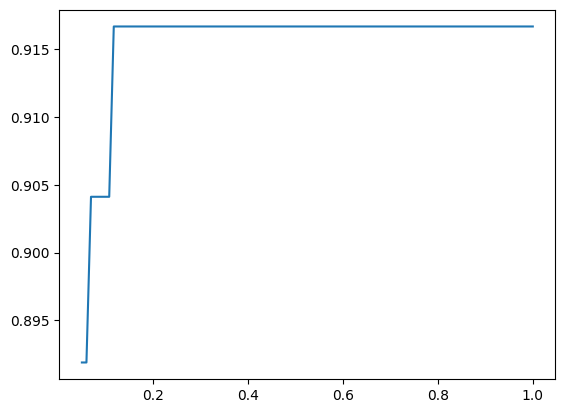

In [175]:
plt.plot(args, vals)

In [226]:
best_pipe = Pipeline(
    [
        ("normalizer", Normalizer()),
        ("vectorizer", CountVectorizer(min_df=2, max_df=100, binary=False)),
        ("scaler_1", LengthScaler()),
        ("scaler_2", StandardScaler()),
        ("model", LogisticRegression()),
    ]
)


best_pipe.fit(data.text, data.label)
f1_score(best_pipe.predict(test.text), test.label)

0.9166666666666666

In [228]:
save_model(best_pipe, "best_linear.pt")